In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [26]:
dataset_train=pd.DataFrame(pd.read_csv("train.csv"))
dataset_test=pd.read_csv("test.csv")


# Analizzo il dataset verificando che tipi di feature ci sono e se sono presenti dei valori nulli

In [27]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DEATH_EVENT               179 non-null    int64  
 1   age                       179 non-null    float64
 2   anaemia                   179 non-null    int64  
 3   creatinine_phosphokinase  179 non-null    int64  
 4   diabetes                  179 non-null    int64  
 5   ejection_fraction         179 non-null    int64  
 6   high_blood_pressure       179 non-null    int64  
 7   platelets                 179 non-null    float64
 8   serum_creatinine          179 non-null    float64
 9   serum_sodium              179 non-null    int64  
 10  sex                       179 non-null    int64  
 11  smoking                   179 non-null    int64  
 12  time                      179 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 18.3 KB


In [28]:
dataset_train.describe()

,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.312849,60.787709,0.424581,541.335196,0.402235,38.022346,0.335196,259115.801564,1.397318,136.329609,0.620112,0.301676,128.581006
std,0.464954,11.884730,0.495666,853.561843,0.491724,11.838309,0.473383,98597.367561,0.868766,4.495661,0.486720,0.460273,79.695332
min,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,113.000000,0.000000,0.000000,4.000000
25%,0.000000,50.500000,0.000000,123.000000,0.000000,30.000000,0.000000,203000.000000,1.000000,134.000000,0.000000,0.000000,65.500000
50%,0.000000,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,257000.000000,1.100000,137.000000,1.000000,0.000000,112.000000
75%,1.000000,69.500000,1.000000,582.000000,1.000000,45.000000,1.000000,300500.000000,1.400000,139.000000,1.000000,1.000000,205.500000
max,1.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,742000.000000,6.100000,145.000000,1.000000,1.000000,285.000000


# Attraverso l'uso dei grafici mostro le relazioni tra le varie feature

distribuzione del sesso nel dataset
0 per le donne
1 per gli uomini


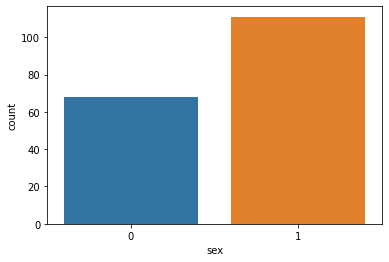

In [29]:
sns.countplot(x=dataset_train.sex)
print("distribuzione del sesso nel dataset\n0 per le donne\n1 per gli uomini")

Possiamo vedere che il sesso non ha uno specifico effetto sulle morti


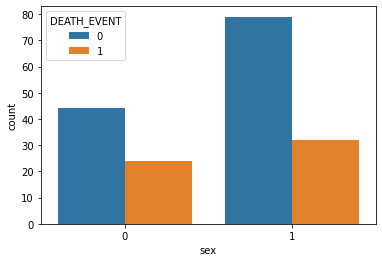

In [30]:
sns.countplot(x=dataset_train.sex,hue=dataset_train.DEATH_EVENT)
print("Possiamo vedere che il sesso non ha uno specifico effetto sulle morti")

Possiamo vedere che il fumo non ha uno specifico effetto sulle morti


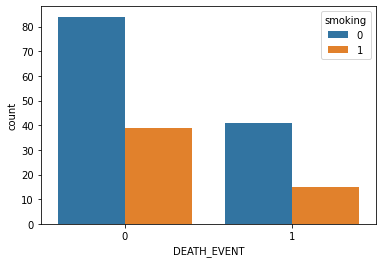

In [31]:
sns.countplot(x=dataset_train.DEATH_EVENT,hue=dataset_train.smoking)
print("Possiamo vedere che il fumo non ha uno specifico effetto sulle morti")

Possiamo vedere che il diabete non ha uno specifico effetto sulle morti


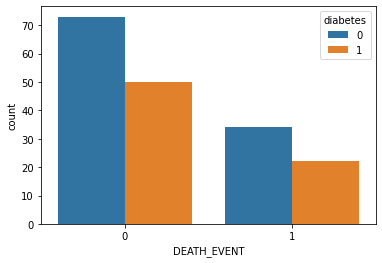

In [32]:
sns.countplot(x=dataset_train.DEATH_EVENT,hue=dataset_train.diabetes)
print("Possiamo vedere che il diabete non ha uno specifico effetto sulle morti")

Possiamo vedere che all'aumentare dell'età il numero delle morti aumenta


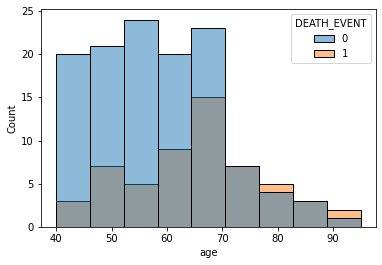

In [33]:
sns.histplot(x=dataset_train.age,hue=dataset_train.DEATH_EVENT)
print("Possiamo vedere che all'aumentare dell'età il numero delle morti aumenta")

<AxesSubplot:>

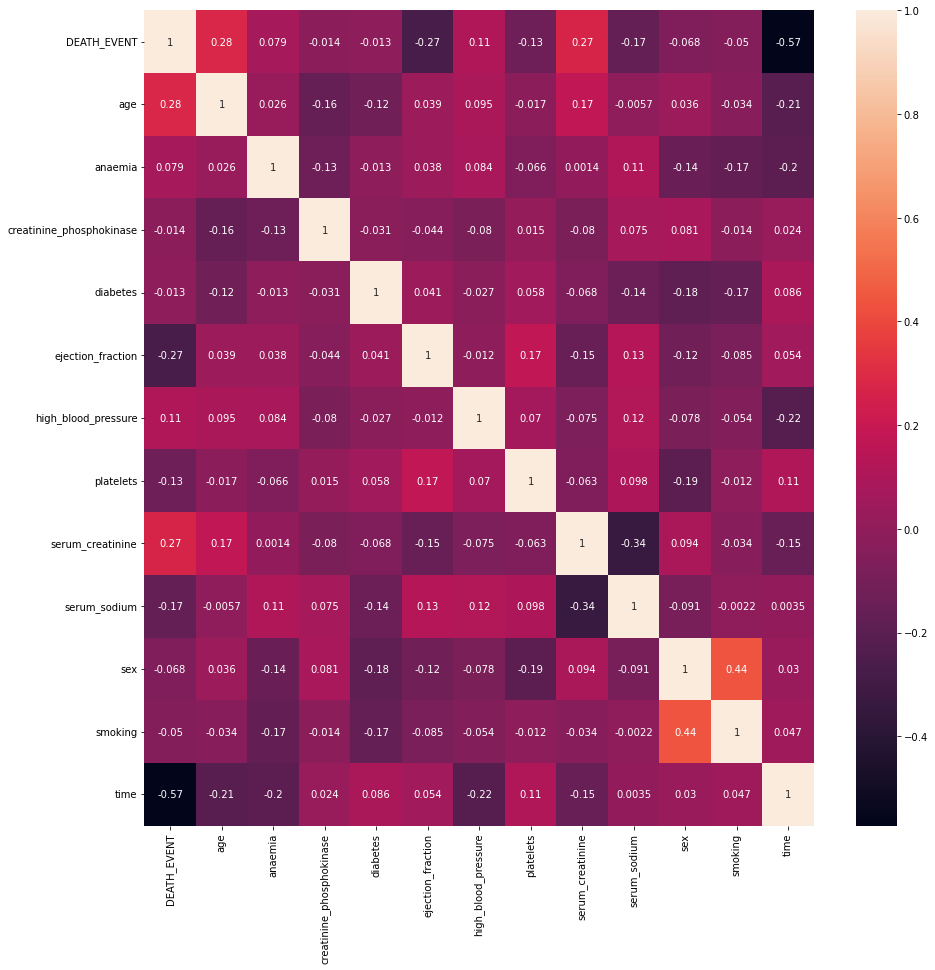

In [34]:
corr = dataset_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)

# Pre-processing delle feature

In [35]:
#converto in intero la variabile age perchè anlizzando il dataset è di tipo float
dataset_train["age"]=dataset_train['age'].astype("int32")
dataset_test["age"]=dataset_test['age'].astype("int32")

#aggiungo una nuova feature nel dataset che data l'età del paziente mi ritorna una fascia di appartenenza(bambino,adulto,ecc) 
category_age_train=pd.cut(dataset_train.age,bins=[18,30,50,60,70,99],labels=[1,2,3,4,5])
dataset_train.insert(1,"age group",category_age_train)

category_age_test=pd.cut(dataset_test.age,bins=[18,30,50,60,70,99],labels=[1,2,3,4,5])
dataset_test.insert(1,"age group",category_age_test)



In [36]:
#normalizzo le features per portarle in un range tra 0 e 1
scaler = MinMaxScaler()
cols= ['platelets','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium']
scaler.fit(dataset_train[cols])

dataset_train[cols] = scaler.transform(dataset_train[cols])
dataset_test[cols] = scaler.transform(dataset_test[cols])



In [37]:
#mostro il dataset con cui verrà addestrato il modello
dataset_train

,DEATH_EVENT,age group,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1,4,62,0,0.026537,0,0.153846,1,0.296403,0.071429,0.84375,1,1,10
1,0,3,60,0,0.029344,0,0.307692,0,0.333813,0.214286,0.84375,1,0,250
2,1,4,68,1,0.025134,0,0.307692,1,0.348201,0.071429,0.84375,1,1,20
3,1,4,65,1,0.013396,1,0.230769,1,0.359712,0.196429,0.71875,0,0,20
4,1,4,70,0,0.017607,0,0.153846,0,0.283453,0.125000,0.90625,0,0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,4,65,1,0.029982,1,0.153846,0,0.217266,0.160714,0.50000,1,0,235
175,1,2,50,0,0.037637,0,0.384615,1,0.243165,0.321429,0.56250,0,0,60
176,0,3,53,1,0.053968,0,0.692308,1,0.311307,0.089286,0.81250,1,0,215
177,0,5,85,0,0.024113,0,0.353846,0,0.200000,0.071429,0.71875,1,0,187


# elimino la colonna Target

In [38]:
Y_train=pd.DataFrame(dataset_train["DEATH_EVENT"])
Y_test=pd.DataFrame(dataset_test["DEATH_EVENT"])


In [39]:
dataset_train=dataset_train.drop(['DEATH_EVENT'],axis=1)
dataset_test=dataset_test.drop(['DEATH_EVENT'],axis=1)


# Addestro il modello

In [40]:
#attraverso la grid_search cerco di trovare i parametri migliori per il modello RandomForestClassifier
parameters = {
        'n_estimators': [200, 300],
        'max_features': [None,'auto', 'sqrt', 'log2'],
        'max_depth': [8,9,10],
        'min_samples_leaf': [10, 20]
    }
scoring = ['accuracy']

grid_search = GridSearchCV(param_grid = parameters,
                            cv = StratifiedKFold(9), 
                            estimator = RandomForestClassifier(criterion='gini'),
                            verbose = 1,
                            scoring = scoring,
                            refit = 'accuracy')

grid_search.fit(dataset_train, Y_train.values.ravel())

Fitting 9 folds for each of 48 candidates, totalling 432 fits


GridSearchCV(cv=StratifiedKFold(n_splits=9, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 20],
                         'n_estimators': [200, 300]},
             refit='accuracy', scoring=['accuracy'], verbose=1)

In [41]:
print("___________________________________________________________________________________________\n")
print(grid_search.best_params_, "\n\nAccuracy score with estimated hyperparameters:", grid_search.best_score_)
print("___________________________________________________________________________________________")

___________________________________________________________________________________________

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'n_estimators': 300} 

Accuracy score with estimated hyperparameters: 0.8883040935672514
___________________________________________________________________________________________


In [22]:
predictTest=grid_search.best_estimator_.predict(dataset_test)
predictTrain=grid_search.best_estimator_.predict(dataset_train)

In [23]:
accuracy_test=accuracy_score(predictTest,Y_test)
accuracy_train=accuracy_score(predictTrain,Y_train)

In [24]:
print (f'{accuracy_train}, {accuracy_test}' )

0.8938547486033519, 0.85
